<a href="https://colab.research.google.com/github/vaguiarfinance/AprendizadoDNC/blob/main/Regress%C3%A3o_N%C3%A3oLinear_TEMPSeatle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_excel("temps.xlsx")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.9+ KB


In [5]:
# Como a variavel Week estava como objeto (Categorica), aplicaremos um Dummie para transforma-la em lógica
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,0,0,0,0,0,1,0


In [6]:
# Selecionando a variavel referência/target
labels = np.array(features["actual"])

# Quais serão as variaveis explicativas, todas exceto a actual que já havia sido escolhida como referência
features = features.drop("actual", axis = 1)
feature_list = list(features.columns)
features = np.array(features)


In [7]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)

In [8]:
# Vamos analisar o modelo em relação a média, para verificarmos como esta a resposta

baseline_preds = test_features[:, feature_list.index("average")]
baseline_error = abs(baseline_preds - test_labels)
print("Baseline error average:", round(np.mean(baseline_error),2))

Baseline error average: 5.06


In [12]:
# Vamos importar as bibliotecas necessárias para treinar e medir o modelo
from sklearn.datasets import make_moons
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [15]:
# Treinando o modelo RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1000, random_state= 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
prediction_rf = rf.predict(test_features)
erro_rf = abs(prediction_rf - test_labels)

r_sq = rf.score(features,labels)
print("R^2:", r_sq)
print("MAE:", metrics.mean_absolute_error(test_labels, prediction_rf))
print("MSE:", metrics.mean_squared_error(test_labels, prediction_rf))

R^2: 0.932094797587982
MAE: 3.932057471264368
MSE: 26.68358100000001


Conluimos que o erro absoluto médio (MAE) é menor do que a média, com isso construimos bom um modelo.

Média 5.06 > 3.93 MAE

In [16]:
# Treinando o modelo AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators= 100)
ada.fit(train_features, train_labels)

ada_pred = ada.predict(test_features)

In [19]:
error_ada = abs(ada_pred - test_labels)

r_sq = ada.score(features,labels)
print("R^2:", r_sq)
print("MAE:", metrics.mean_absolute_error(test_labels, ada_pred))
print("MSE:", metrics.mean_squared_error(test_labels, ada_pred))

R^2: 0.8778327546366982
MAE: 3.609523277823419
MSE: 22.51080533569887


O MOdelo AdaBoostRegressor teve uma performace ainda melhor que o Modelo RandomForestRegressor

In [21]:
# Treinando o modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(train_features, train_labels)
gbr_pred = gbr.predict(test_features)

In [22]:
error_gbr = abs(gbr_pred - test_labels)

r_sq = gbr.score(features,labels)
print("R^2:", r_sq)
print("MAE:", metrics.mean_absolute_error(test_labels, gbr_pred))
print("MSE:", metrics.mean_squared_error(test_labels, gbr_pred))

R^2: 0.9175596555480513
MAE: 4.079084397115504
MSE: 28.527137469473054


Ao avaliarmos a performace dos 3 MOdelos criamos, concluímos que o AdaBoostRegressor é o Modelo que obteve o melhor desempenho ( Menor MAE )

In [23]:
# Vamos criar as Árvore de decisão do modelo

rf = RandomForestRegressor(max_depth=3)
rf.fit(train_features, train_labels)

tree = rf.estimators_[5]

tree

DecisionTreeRegressor(max_depth=3, max_features=1.0, random_state=1405772481)

In [26]:
# Vamos preparar para exportar a imagem da árvore

from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree, out_file="tree.dot", feature_names = feature_list, rounded = True, precision=1)
(graph, ) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

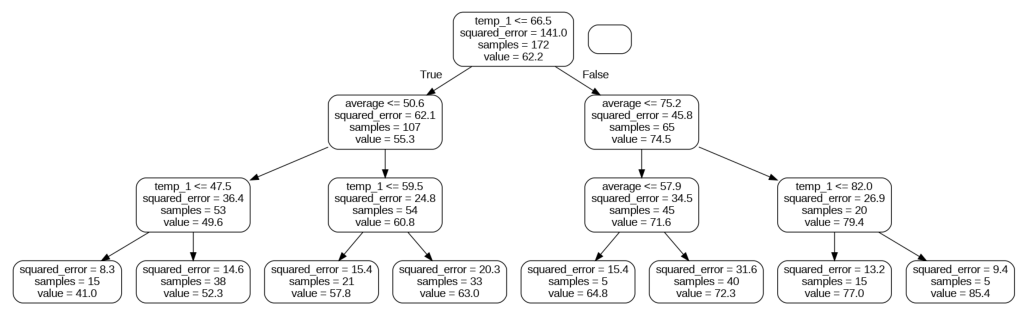

In [45]:
# Carregar a imagem PNG usando Matplotlib
imagem = plt.imread("/content/tree.png")
plt.figure(figsize=(13, 13))
sns.set_style("whitegrid")
plt.imshow(imagem)
# Remover eixos
plt.axis('off')
# Exibindo a Imagem
plt.show()

In [46]:
# Vamos avaliar quais as várias possuem mais importancia para o impacto da temperatura, no modelo RandomForestRegressor

importances = list(rf.feature_importances_)

feature_importance = [(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.77
Feature: average              Importance 0.21
Feature: temp_2               Importance 0.02
Feature: year                 Importance 0.0
Feature: month                Importance 0.0
Feature: day                  Importance 0.0
Feature: week_Fri             Importance 0.0
Feature: week_Mon             Importance 0.0
Feature: week_Sat             Importance 0.0
Feature: week_Sun             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0
Feature: week_Wed             Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [47]:
# Vamos avaliar quais as várias possuem mais importancia para o impacto da temperatura, no modelo AdaBoostRegressor
importances = list(ada.feature_importances_)

feature_importance = [(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.52
Feature: average              Importance 0.25
Feature: temp_2               Importance 0.09
Feature: month                Importance 0.05
Feature: day                  Importance 0.03
Feature: week_Mon             Importance 0.03
Feature: week_Fri             Importance 0.01
Feature: week_Sun             Importance 0.01
Feature: year                 Importance 0.0
Feature: week_Sat             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0
Feature: week_Wed             Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [49]:
# Vamos avaliar quais as várias possuem mais importancia para o impacto da temperatura, no modelo GradientBoostingRegressor
importances = list(gbr.feature_importances_)

feature_importance = [(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.63
Feature: average              Importance 0.3
Feature: day                  Importance 0.02
Feature: month                Importance 0.01
Feature: temp_2               Importance 0.01
Feature: week_Fri             Importance 0.01
Feature: year                 Importance 0.0
Feature: week_Mon             Importance 0.0
Feature: week_Sat             Importance 0.0
Feature: week_Sun             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0
Feature: week_Wed             Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]